# SRE Test Codes

Julie Butler Hartley

Date Created: April 15, 2021

Last Modified: APril 16, 2021

## Imports

At the current version need to import all four files of SRE separately.

In [2]:
# Third-Party Imports
import numpy as np
import matplotlib.pyplot as plt

# Local Imports (look at the files for documentation)
from Regression import *
from Analysis import *
from Support import *
from Extrapolate import *

## Approximating Sine

The following code uses SRE to approximate a sine function using SRE.  The results from SRE can be changed by changing the alpha value and/or the length of the sequence (seq).  The range can be made pretty small and this method can still approximate sine very well.

16
Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data is 7.972240436632377e-25
The R2 score between the predicted and true data is 1.0


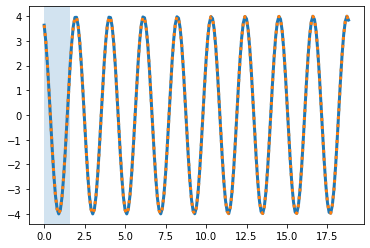

In [183]:
# Create the total data set and plot it
Xtot = np.arange(0, 6*np.pi, 0.1)
ytot = 4*np.sin(3*Xtot+2)
plt.plot(Xtot, ytot, linewidth=3, label="True Data")

# Set the min and max values for the training data and plot the region
min = 0
max = 0.5*np.pi
plt.axvspan(min, max, alpha=0.2)

# Create the training data
Xtrain = np.arange(min, max, 0.1)
ytrain = 4*np.sin(3*Xtrain+2)
# Note: training data needs to be a LIST
ytrain = ytrain.tolist()
print(len(Xtrain))

# Format only the y component of the training data using sequential
# data formatting
X, y = format_sequential_data (ytrain, seq=2)

# Initialize and instance of the ridge regression classs and train
# it using the formatted data
R = RR(0, True)
R.fit(X, y)

# Using the trained ridge regression algorithm, extrapolate the
# training data set until the total set is the same length as the
# total data set
y_test = sequential_extrapolate(R, ytrain, len(ytot), seq=2,\
    isAutoRegressive = False, isErrorAnalysis = True, y_true = ytot)

# Plot the predicted data and save the image
plt.plot(Xtot, y_test, ':', label="Predicted Data", linewidth=3)
plt.savefig("sine.png",dpi=1000)


## Aproximating A Polynomial

The below code shows how well a ridge regression algorithm can approximate a polynomial using SRE.  Ridge regression does not work too well for degrees above 2, so to test other degrees I would recommend using Kernel Ridge Regression (KRR) instead of regular Ridge Regression.

1e-05 5
Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data is 0.00016668664504665144
The R2 score between the predicted and true data is 0.9916737537233016
*****************************************
*****************************************
NEW BEST RESULT: 1.5153331367877403e-05 1e-05 5
*****************************************
*****************************************
9.986164341289607


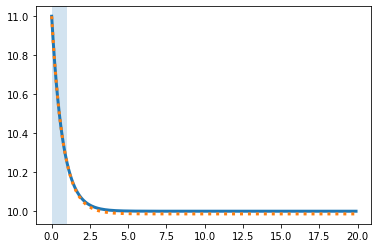

In [14]:
# Create the total data set and plot it
degree = 4
coef = 4
Xtot = np.arange(0, 20, 0.1)
ytot = (1/4)**Xtot + 10
plt.plot(Xtot, ytot, linewidth=3, label="True Data")

# Set the min and max values for the training data and plot the region
min = 0
max = 1
plt.axvspan(min, max, alpha=0.2)

# Create the training data
Xtrain = np.arange(min, max, 0.1)
ytrain = (1/4)**Xtrain + 10
# Note: training data needs to be a LIST
ytrain = ytrain.tolist()

# Regression Parameters
seq = 10
alpha = 10

best_result = 100000

for seq in [5]:
    for alpha in [1e-5]:
        # Format only the y component of the training data using sequential
        # data formatting
        X, y = format_sequential_data (ytrain, seq=seq)

        print(alpha, seq)
        # Initialize and instance of the ridge regression classs and train
        # it using the formatted data
        R = RR(alpha, True)
        R.fit(X, y)

        # Using the trained ridge regression algorithm, extrapolate the
        # training data set until the total set is the same length as the
        # total data set
        y_test = sequential_extrapolate(R, ytrain, len(ytot), seq=seq,\
            isAutoRegressive = False, isErrorAnalysis = True, y_true = ytot)

        
        
        err = np.average((np.asarray(y_test) - np.asarray(ytot))**2)/np.max(ytot)
        if err < best_result:
            best_result = err
            print("*****************************************")
            print("*****************************************")
            print ("NEW BEST RESULT:", err, alpha, seq)
            print("*****************************************")
            print("*****************************************")            

        # Plot the predicted data and save the image
        plt.plot(Xtot, y_test, ':', label="Predicted Data", linewidth=3)
        plt.legend
#plt.savefig("polynomial.png",dpi=1000)

        print(y_test[-1])


# Physics Data Sets

Finally, the file DataSets.py provides a few small physics data sets to test.

Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data is 1.0081645744465572e-05
The R2 score between the predicted and true data is 0.9999621711563242


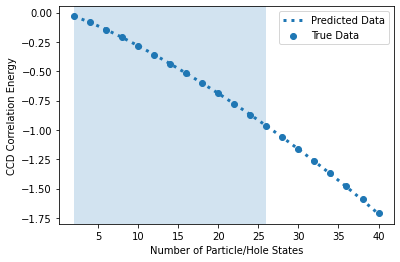

In [110]:
from DataSets import *
# Create the total data set and plot it
name, training_dim, Xtot, ytot = VaryDimension ()
plt.scatter(Xtot, ytot, label="True Data")

# Set the min and max values for the training data and plot the region
min = 0
max = training_dim
plt.axvspan(Xtot[min], Xtot[max], alpha=0.2)

# Create the training data
Xtrain = Xtot[min:max]
ytrain = ytot[min:max]
# Note: training data needs to be a LIST
ytrain = ytrain.tolist()

# Regression Parameters
seq = 2
alpha = 0

# Format only the y component of the training data using sequential
# data formatting
X, y = format_sequential_data (ytrain, seq=seq)
# Initialize and instance of the ridge regression classs and train
# it using the formatted data
R = RR(alpha, True)
R.fit(X, y)

# Using the trained ridge regression algorithm, extrapolate the
# training data set until the total set is the same length as the
# total data set
y_test = sequential_extrapolate(R, ytrain, len(ytot), seq=seq,\
    isAutoRegressive = False, isErrorAnalysis = True, y_true = ytot)

# Plot the predicted data and save the image
plt.plot(Xtot, y_test, ':', label="Predicted Data", linewidth=3)
plt.xlabel("Number of Particle/Hole States")
plt.ylabel("CCD Correlation Energy")
plt.legend()
plt.savefig("CC_reg_1.png",dpi=1000)

In [70]:
from DataSets import *
# Create the total data set and plot it
name, training_dim, Xtot, ytot = VaryDimension ()
#plt.scatter(Xtot, ytot, linewidth=3, label="True Data")

# Set the min and max values for the training data and plot the region
min = 0
#max = 7
# Regression Parameters
#seq = 3
alpha = 0
data = []
data_matrix = np.zeros((5,13))
for seq in range(1, 6):
    for max in range (4, 17):
        case1 = seq!=2 or max!=4
        case2 = seq!=3 or max!=4 
        case3 = seq!=3 or max!=5 
        case4 = seq!=3 or max!=6
        case5 = seq!=4 or max!=5
        case6 = seq!=4 or max!=6        
        case7 = seq!=5 or max!=6        
        case8 = seq!=5 or max!=8        

        if seq < max and case1 and case2 and case3 and case4 and case5 and case6 and case7 and case8:
            #plt.axvspan(Xtot[min], Xtot[max], alpha=0.2)
            print("***** Seq:", seq, "***** max:", max, "*******")
            # Create the training data
            Xtrain = Xtot[min:max]
            ytrain = ytot[min:max]
            # Note: training data needs to be a LIST
            ytrain = ytrain.tolist()



            # Format only the y component of the training data using sequential
            # data formatting
            X, y = format_sequential_data (ytrain, seq=seq)

            # Initialize and instance of the ridge regression classs and train
            # it using the formatted data
            R = RR(alpha, True)
            R.fit(X, y)

            try:
                # Using the trained ridge regression algorithm, extrapolate the
                # training data set until the total set is the same length as the
                # total data set
                y_test = sequential_extrapolate(R, ytrain, len(ytot), seq=seq,\
                    isAutoRegressive = False, isErrorAnalysis = True, y_true = ytot)
            except:
                print("Linear Algebra Error")
            print()
            print()
            data.append([seq, max, np.average((np.asarray(y_test)-np.asarray(ytot))**2)])
            data_matrix[seq-1][max-4] = np.average((np.asarray(y_test)-np.asarray(ytot))**2)
            
        if not case1 or not case2 or not case3 or not case4 or not case5 or not case6 or not case7 or not case8:
            data.append([seq, max, np.nan])
            data_matrix[seq-1][max-4] = np.nan

    # Plot the predicted data and save the image
    #plt.plot(Xtot, y_test, ':', label="Predicted Data", linewidth=3)
    #plt.xlabel("Number of Particle/Hole States")
    #plt.ylabel("CCD Correlation Energy")
    #plt.savefig("CC.png",dpi=1000)




***** Seq: 1 ***** max: 4 *******
Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data is 0.5392928578780445
The R2 score between the predicted and true data is 0.5259649530927601


***** Seq: 1 ***** max: 5 *******
Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data is 0.19427347020274321
The R2 score between the predicted and true data is 0.7269352443608693


***** Seq: 1 ***** max: 6 *******
Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified 

Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data is 17.828472949558225
The R2 score between the predicted and true data is -0.3400478451599165


***** Seq: 5 ***** max: 12 *******
Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
The MSE score between the predicted and true data is 0.00018304305100484363
The R2 score between the predicted and true data is 0.999283504728047


***** Seq: 5 ***** max: 13 *******
Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Inter

In [71]:
print (data)

[[1, 4, 0.5392928578780445], [1, 5, 0.19427347020274321], [1, 6, 0.08292256036340521], [1, 7, 0.0389591732897258], [1, 8, 0.019361299678911988], [1, 9, 0.009927398374416826], [1, 10, 0.005159472315238818], [1, 11, 0.0026790797895534443], [1, 12, 0.0013714278381434086], [1, 13, 0.0006823906696719886], [1, 14, 0.00032451269686158124], [1, 15, 0.00014419336710272385], [1, 16, 5.786978699488341e-05], [2, 4, nan], [2, 5, 0.0036839170293030852], [2, 6, 0.0016209342674523633], [2, 7, 0.0007340588956275703], [2, 8, 0.00033425573633155144], [2, 9, 0.0001500814116833144], [2, 10, 6.51707438664833e-05], [2, 11, 2.675949035505851e-05], [2, 12, 1.0081645744465572e-05], [2, 13, 3.328386824142846e-06], [2, 14, 8.867107762734667e-07], [2, 15, 1.585141882492192e-07], [2, 16, 1.01615534675292e-08], [3, 4, nan], [3, 5, nan], [3, 6, nan], [3, 7, 6.393986126510828e-06], [3, 8, 1.013389317878994e-06], [3, 9, 7.03800516022891e-08], [3, 10, 2.2252954683213953e-07], [3, 11, 4.6045929811125283e-07], [3, 12, 5.5

nan

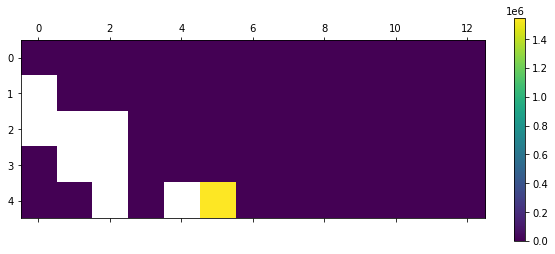

In [111]:
a = np.array([[1,3],[np.nan,5]])
plt.matshow(data_matrix)
plt.colorbar()
np.min(data_matrix)

In [76]:
seq_1_max = []
seq_1_err = []
seq_2_max = []
seq_2_err = []
seq_3_max = []
seq_3_err = []
seq_4_max = []
seq_4_err = []
seq_5_max = []
seq_5_err = []

for i in data:
    if i[0] == 1:
        seq_1_max.append(i[1])
        seq_1_err.append(i[2])
    elif i[0] == 2:
        seq_2_max.append(i[1])
        seq_2_err.append(i[2])
    elif i[0] == 3:
        seq_3_max.append(i[1])
        seq_3_err.append(i[2])
    elif i[0] == 4:
        seq_4_max.append(i[1])
        seq_4_err.append(i[2])
    elif i[0] == 5:
        seq_5_max.append(i[1])
        seq_5_err.append(i[2])

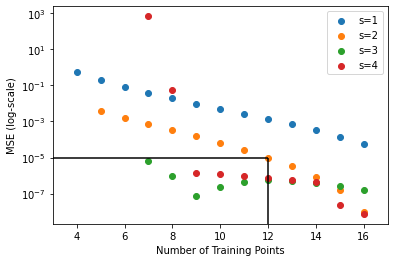

In [100]:
plt.scatter(seq_1_max, seq_1_err, label='s=1')
plt.scatter(seq_2_max, seq_2_err, label='s=2')
plt.scatter(seq_3_max, seq_3_err, label='s=3')
plt.scatter(seq_4_max, seq_4_err, label='s=4')
#plt.scatter(seq_5_max, seq_5_err, label='s=5')
plt.legend()
plt.yscale('log')
plt.vlines(12, 0, seq_2_err[8])
plt.hlines(seq_2_err[8], 0, 12)
plt.xlim(3, 17)
plt.xlabel("Number of Training Points")
plt.ylabel("MSE (log-scale)")
plt.savefig("smallcomp.png")

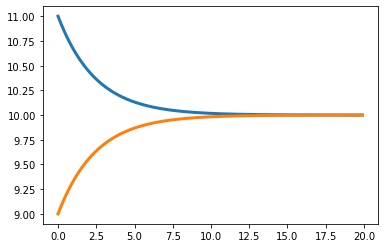

In [170]:
Xtot = np.arange(0, 20, 0.1)
ytot1 = 1*(1/1.5)**Xtot + 10
ytot2 = -1*(1/1.5)**Xtot + 10

plt.plot(Xtot, ytot1, linewidth=3)
plt.plot(Xtot, ytot2, linewidth=3)
plt.savefig("conv.png")

In [181]:
for i in range (1, len(Xtot)):
    print(i, ytot1[i]-ytot1[i-1], ytot2[i]-ytot2[i-1])

1 -0.03973549920778119 0.03973549920778119
2 -0.03815658931049093 0.03815658931049093
3 -0.03664041818617214 0.03664041818617214
4 -0.03518449287836134 0.03518449287836134
5 -0.033786419489468145 0.033786419489468145
6 -0.03244389924461011 0.03244389924461011
7 -0.031154724711878856 0.031154724711878856
8 -0.02991677617277233 0.02991677617277233
9 -0.028728018136858324 0.028728018136858324
10 -0.027586495994940563 0.027586495994940563
11 -0.026490332805186867 0.026490332805186867
12 -0.02543772620699336 0.02543772620699336
13 -0.02442694545744928 0.02442694545744928
14 -0.023456328585574227 0.023456328585574227
15 -0.02252427965964543 0.02252427965964543
16 -0.021629266163072813 0.021629266163072813
17 -0.02076981647458709 0.02076981647458709
18 -0.01994451744851311 0.01994451744851311
19 -0.019152012091240067 0.019152012091240067
20 -0.01839099732995919 0.01839099732995919
21 -0.01766022187012517 0.01766022187012517
22 -0.016958484137996166 0.016958484137996166
23 -0.01628463030496441

1e-05 5
Starting Linear Regression
Solving Using Closed Form Ridge Regression
Iterative Solving Methods May be Implemented in later versions
Performing Modified Ridge Regression
Data Normalization and Fitting an Intercept Will Be Used
10.012910108392981


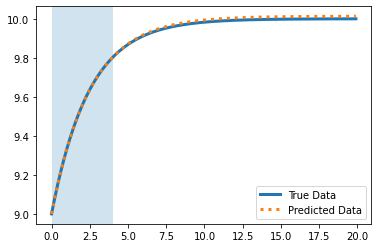

In [180]:
max_data = []
conv = []
for max in [40]:
    # Set the min and max values for the training data and plot the region
    min = 0
    plt.axvspan(Xtot[min], Xtot[max], alpha=0.2)
    plt.plot(Xtot, ytot2, linewidth=3, label="True Data")

    # Create the training data
    Xtrain = Xtot[min:max]
    ytrain = ytot2[min:max]
    # Note: training data needs to be a LIST
    ytrain = ytrain.tolist()

    # Regression Parameters
    seq = 5
    alpha = 1e-5

    # Format only the y component of the training data using sequential
    # data formatting
    X, y = format_sequential_data (ytrain, seq=seq)

    print(alpha, seq)
    # Initialize and instance of the ridge regression classs and train
    # it using the formatted data
    R = RR(alpha, True)
    R.fit(X, y)

    # Using the trained ridge regression algorithm, extrapolate the
    # training data set until the total set is the same length as the
    # total data set
    y_test = sequential_extrapolate(R, ytrain, len(ytot1), seq=seq,\
        isAutoRegressive = False, isErrorAnalysis = False, y_true = ytot1)
    # Plot the predicted data and save the image
    plt.plot(Xtot, y_test, ':', label="Predicted Data", linewidth=3)
    plt.legend()
    plt.savefig("conv_up.png",dpi=1000)

    print(y_test[-1])



(0.0, 105.0)

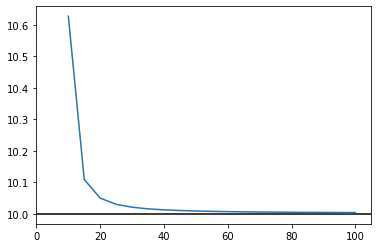

In [160]:
plt.plot(max_data, conv)
plt.hlines(10, 0, 105)
plt.xlim(0, 105)

In [164]:

percent = (10-np.asarray(conv))

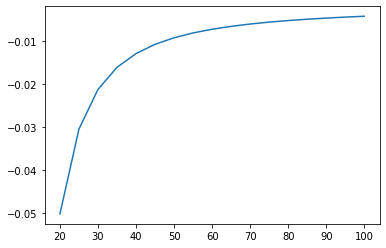

In [167]:
plt.plot(max_data[2:], percent[2:])